## Desarrollo de modelo con Keras

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation,  MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 
from keras.datasets import mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import random


import tensorflow as tf
from tensorflow.python.client import device_lib
physical_device = tf.config.experimental.list_physical_devices('GPU')
print(f'Device found : {physical_device}')
tf.config.experimental.set_memory_growth(physical_device[0],True)

Using TensorFlow backend.


Device found : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


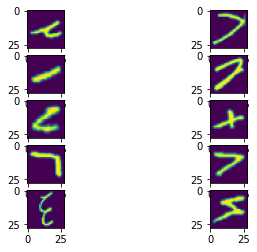

Datos de entrenamiento:  79919
Datos de prueba:  8880


In [3]:
raw_data = pd.read_csv("emnist-letters-train/emnist-letters-train.csv")

all_X = raw_data.values[:,1:]
all_y = raw_data.values[:,0]

all_X = np.array(all_X)
all_y = np.array(all_y)

X_train = all_X.reshape(all_X.shape[0], 1, 28, 28).astype('float32') #3d array
y_train = all_y


X_train = X_train / 255

y_train = np_utils.to_categorical(y_train)
num_classes = y_train.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0)

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

# Visualizar los datos
fig = plt.figure()
for i in range (0,10):
  a = fig.add_subplot(5,2,i+1)
  plt.imshow(np.squeeze(X_train[i]))
plt.show()

print('Datos de entrenamiento: ', len(X_train))
print('Datos de prueba: ', len(X_test))

In [4]:
# Arquitectura 02

input_layer = Input((28,28,1))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(num_classes)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 32)        0   

In [5]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(X_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (X_test, y_test))

Train on 79919 samples, validate on 8880 samples
Epoch 1/10
79919/79919 [==============================] - 23s 282us/step - loss: 0.7142 - accuracy: 0.7884 - val_loss: 0.3132 - val_accuracy: 0.8967
Epoch 2/10
79919/79919 [==============================] - 20s 252us/step - loss: 0.3919 - accuracy: 0.8764 - val_loss: 0.2544 - val_accuracy: 0.9123
Epoch 3/10
79919/79919 [==============================] - 20s 253us/step - loss: 0.3211 - accuracy: 0.8970 - val_loss: 0.2196 - val_accuracy: 0.9233
Epoch 4/10
79919/79919 [==============================] - 20s 253us/step - loss: 0.2874 - accuracy: 0.9065 - val_loss: 0.2281 - val_accuracy: 0.9205
Epoch 5/10
79919/79919 [==============================] - 20s 255us/step - loss: 0.2644 - accuracy: 0.9115 - val_loss: 0.1996 - val_accuracy: 0.9271
Epoch 6/10
79919/79919 [==============================] - 20s 255us/step - loss: 0.2500 - accuracy: 0.9168 - val_loss: 0.1992 - val_accuracy: 0.9285
Epoch 7/10
79919/79919 [==============================] -

In [ ]:
# Guardar
json_string = model.to_json()
with open("Modelos entrenados/letras.json", "w") as json_file:
    json_file.write(json_string)
model.save_weights("models/letras.h5")

print("Modelo guardado")

In [7]:
model.evaluate(X_test, y_test, batch_size=1000)

8880/8880 [==============================] - 1s 87us/step


[0.19455197574319066, 0.929729700088501]